**Class:** C5.4 Networks

**From:** Miguel Torres Costa

**To:** Mr Michael Coughlan

# All imports

In [1]:
import numpy as np
import networkx as nx
import math
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

# Utils

In [2]:
def draw(G,**kwargs):
    print("Number of nodes: " + str(len(G.nodes())))
    if len(G)<40:
        nx.draw_spring(G,
                       node_size=400,
                       with_labels=True)
    else:
        nx.draw_spring(G,
                       node_size=.5,
                       with_labels=False)       

In [3]:
def create_undirected_graph(edges):
    G=nx.Graph()
    G.add_edges_from(edges)
    return G

In [4]:
def create_directed_graph(edges):
    DG=nx.DiGraph()
    DG.add_edges_from(edges)
    return DG

In [5]:
def load_graph_from_tsv(file):
    f = open("datasets/" + str(file),"r")
    text = f.readlines()
    clean = lambda x:x.strip("\n").split(" ")
    node_pairs = list(map(clean,text[2:]))
    node_pairs = [(int(x[0]),int(x[1])) for x in node_pairs]
    node_pairs[:4]
    G = nx.Graph()
    G.add_edges_from(node_pairs)
    return G

In [6]:
def size_of_largest_component(G):
    return nx.number_of_nodes(max(nx.connected_component_subgraphs(G), key=len))

def average_degree(G):
    degrees = G.degree() # Creates a DegreeView
    degrees = list(map(lambda x:x[1],degrees)) # Creates list of degrees
    return np.mean(degrees)

# (Q2) Graph Partitioning

In [7]:
# Given the vector v2, returns the 2 possible best choices of s
# Following Renauld's notes, page 27
# s might not have the expected size if there are repeated values in v2
def possible_s(v2,size):
    cut_point_1 = sorted(v2)[size]
    cut_point_2 = sorted(v2)[-size]
    s_1 = [x < cut_point_1 for x in v2]
    s_2 = [x < cut_point_2 for x in v2]
    s_1 = np.where(s_1)[0]
    s_2 = np.where(s_2)[0]
    return [s_1,s_2]

In [8]:
def bipartition(G,size):
    # Assertions
    assert(size < len(G))
    assert(size > 0)
    
    L = nx.laplacian_matrix(G).todense() # Laplacian
    eigenvectors = np.linalg.eig(L)[1] # List of eigenvectors
    eigenvectors = sorted(eigenvectors, key = lambda x:np.linalg.norm(x))
    v2 = np.asarray(eigenvectors[1])[0] #
    solutions = possible_s(v2,size)
    if nx.cut_size(G,solutions[0]) < nx.cut_size(G,solutions[1]):
        answer = solutions[0]
    else:
        answer = solutions[1]
    return answer

In [9]:
G = nx.erdos_renyi_graph(7,.5)
bipartition(G,3)

array([2, 3, 5, 6])

Number of nodes: 7


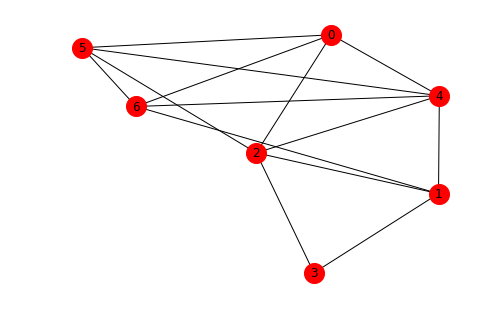

In [10]:
draw(G)

# (Q3) Modularity

**(a)**